In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

In [2]:
# --- Load CSVs ---
df_sort = pd.read_csv("sort.csv")
df_ops  = pd.read_csv("ops.csv")
df_mem  = pd.read_csv("memory.csv")

df_sort, df_ops, df_mem

(    method  input_size  time_ms
 0  builtin         100        0
 1  builtin        1000        4
 2  builtin       10000       43
 3  builtin      100000      566
 4    radix         100        0
 5    radix        1000        1
 6    radix       10000       14
 7    radix      100000      142,
     db  input_size       ops
 0    1         100  36479200
 1    1        1000  19952016
 2    1       10000   5838991
 3    1      100000    751450
 4   1L         100   9879200
 5   1L        1000   1565357
 6   1L       10000    383064
 7   1L      100000    348657
 8   1S         100  20691173
 9   1S        1000   4088412
 10  1S       10000   1031386
 11  1S      100000    944957
 12   2         100  22196659
 13   2        1000  11875935
 14   2       10000   4132252
 15   2      100000    447651
 16  2L         100   7506256
 17  2L        1000   1536400
 18  2L       10000    387538
 19  2L      100000    332630
 20  2S         100  14831114
 21  2S        1000   3640001
 22  2S     

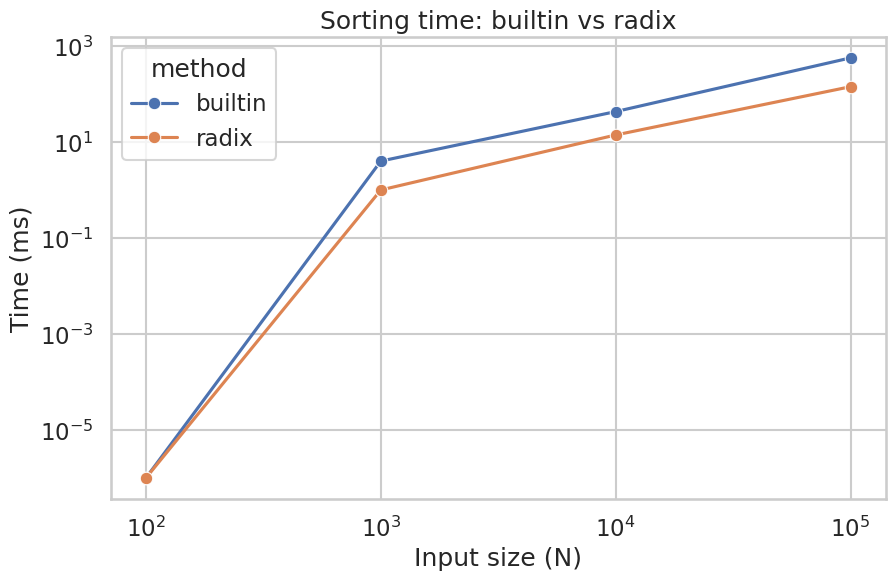

In [6]:
EPS = 1e-6
df_sort["time_ms_adj"] = df_sort["time_ms"].clip(lower=EPS)

plt.figure(figsize=(10,6))
sns.lineplot(data=df_sort, x="input_size", y="time_ms_adj", hue="method", marker="o")
plt.title("Sorting time: builtin vs radix")
plt.xlabel("Input size (N)")
plt.ylabel("Time (ms)")
plt.xscale("log")
plt.yscale("log")
plt.show()


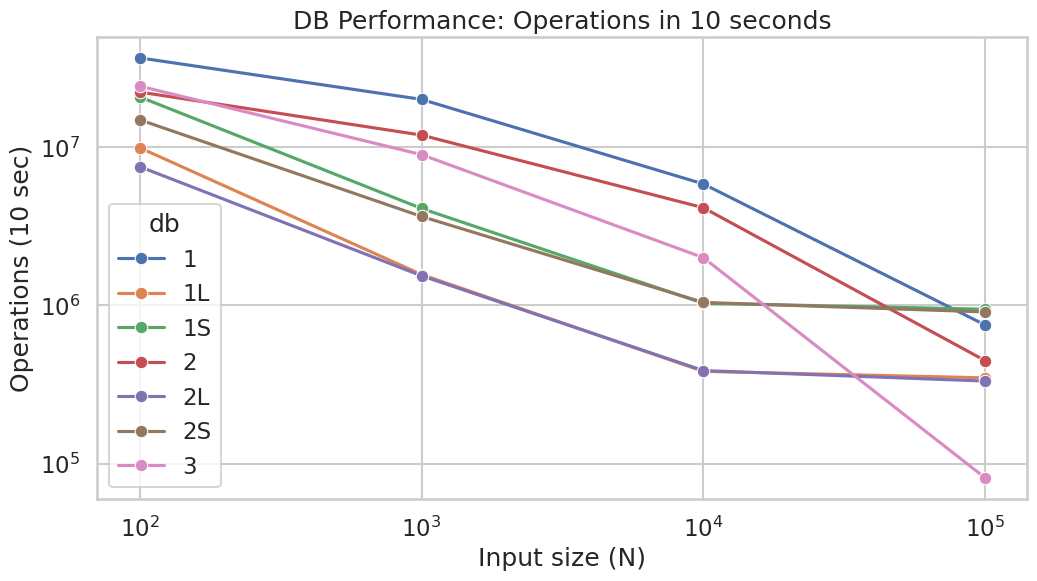

In [4]:
# --- DB ops benchmark ---
plt.figure(figsize=(12,6))
sns.lineplot(data=df_ops, x="input_size", y="ops", hue="db", marker="o")
plt.title("DB Performance: Operations in 10 seconds")
plt.xlabel("Input size (N)")
plt.ylabel("Operations (10 sec)")
plt.xscale('log')
plt.yscale('log')
plt.show()

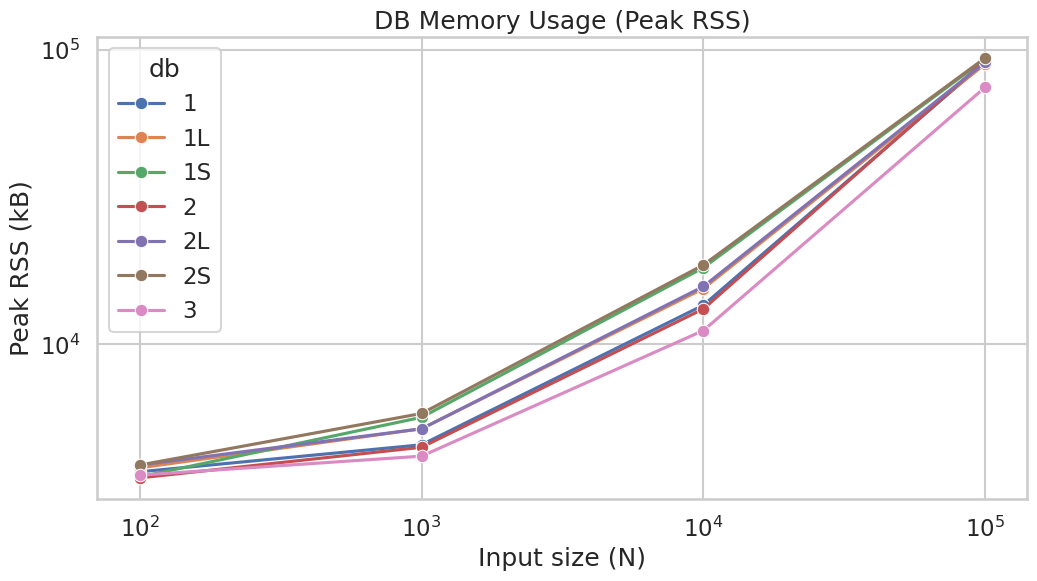

In [5]:
# --- Memory peaks ---
plt.figure(figsize=(12,6))
sns.lineplot(data=df_mem, x="input_size", y="peak_kb", hue="db", marker="o")
plt.title("DB Memory Usage (Peak RSS)")
plt.xlabel("Input size (N)")
plt.ylabel("Peak RSS (kB)")
plt.xscale('log')
plt.yscale('log')
plt.show()